In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255 )

In [4]:
image_gen.flow_from_directory(r"D:\STUDY\OPENCV\Opencv _course\Opencv notebooks\DNN\CATS_DOGS\test")

Found 6251 images belonging to 2 classes.


In [5]:
image_gen.flow_from_directory(r"D:\STUDY\OPENCV\Opencv _course\Opencv notebooks\DNN\CATS_DOGS\train")

Found 18743 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Flatten,Dense, Conv2D, MaxPooling2D, Dropout

In [29]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3), input_shape=(150,150,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,kernel_size=(3,3), input_shape=(150,150,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128,kernel_size=(3,3), input_shape=(150,150,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3), input_shape=(150,150,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units =128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =1, activation = "sigmoid"))   
model.compile(optimizer ="adam", loss= "binary_crossentropy", metrics = ["accuracy"])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 32)        36896     
__________

In [31]:
train_image_gen = image_gen.flow_from_directory(r"D:\STUDY\OPENCV\Opencv _course\Opencv notebooks\DNN\CATS_DOGS\train", target_size =(150,150), batch_size = 16, class_mode="binary")

Found 18743 images belonging to 2 classes.


In [32]:
test_image_gen = image_gen.flow_from_directory(r"D:\STUDY\OPENCV\Opencv _course\Opencv notebooks\DNN\CATS_DOGS\test", target_size =(150,150), batch_size = 16, class_mode="binary")

Found 6251 images belonging to 2 classes.


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
results = model.fit_generator(train_image_gen, epochs = 10, steps_per_epoch = 150, validation_data = test_image_gen, validation_steps = 12)

Epoch 1/10
150/150 [==============================] - 267s 2s/step - loss: 0.6944 - acc: 0.5221 - val_loss: 0.6924 - val_acc: 0.5030
Epoch 2/10
150/150 [==============================] - 157s 1s/step - loss: 0.6878 - acc: 0.5325 - val_loss: 0.6894 - val_acc: 0.5178
Epoch 3/10
150/150 [==============================] - 172s 1s/step - loss: 0.6833 - acc: 0.5600 - val_loss: 0.6604 - val_acc: 0.5868
Epoch 4/10
150/150 [==============================] - 173s 1s/step - loss: 0.6771 - acc: 0.5763 - val_loss: 0.6626 - val_acc: 0.5986
Epoch 5/10
150/150 [==============================] - 160s 1s/step - loss: 0.6751 - acc: 0.5525 - val_loss: 0.6821 - val_acc: 0.5588
Epoch 6/10
150/150 [==============================] - 156s 1s/step - loss: 0.6902 - acc: 0.5498 - val_loss: 0.6831 - val_acc: 0.5644
Epoch 7/10
150/150 [==============================] - 156s 1s/step - loss: 0.6842 - acc: 0.5596 - val_loss: 0.6797 - val_acc: 0.5682
Epoch 8/10
150/150 [==============================] - 136s 909ms/step

In [35]:
results.history["acc"]

[0.5220833333333333,
 0.5325,
 0.56,
 0.57625,
 0.5525,
 0.5491426182012585,
 0.5595833333333333,
 0.55875,
 0.58875,
 0.5993308239355091]

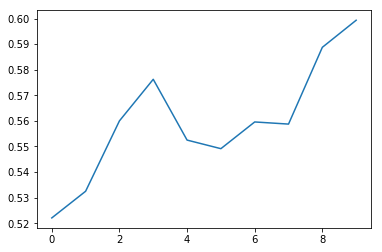

In [36]:
plt.plot(results.history["acc"])

In [37]:
import numpy as np
from keras.preprocessing import image

In [40]:
dog_file = "CATS_DOGS/train/Dog/2.jpg"

In [44]:
dog_img = image.load_img(dog_file, target_size= (150,150) )
dog_img = image.img_to_array(dog_img)
dog_img = np.expand_dims(dog_img, axis =0)
dog_img= dog_img/255

In [45]:
dog_img.shape

(1, 150, 150, 3)

In [48]:
 model.predict(dog_img)

array([[0.5562691]], dtype=float32)